# N-grams Analysis

In this notebook, we explore the use of N-grams to analyze textual data from job advertisement titles. N-grams are continuous sequences of n items from a given text sample. With this, we can discover common phrases and terms used in job descriptions, providing deeper insights into the language and trends of the bioinformatics job market.

First, let's import the necessary dependencies, then load and display our dataset.

In [1]:
import pandas as pd
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer 
from collections import Counter

import nltk
from nltk import ngrams
from nltk import word_tokenize
from nltk.corpus import stopwords
import gensim.models.keyedvectors as word2vec

import seaborn as sns
import matplotlib.pyplot as plt

import re

import string

In [21]:
df = pd.read_csv('job_bioinfo_csv/bioinf_ads_preprocessed.csv')

In [22]:
df.head(2)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,word_count,text_result,title_result
0,0,0,0,http://diffbot.com/entity/JOB966384586,en,JOB966384586,1591962958,"Bioinformatics Specialist, GIS",https://www.nature.com/naturecareers/job/bioin...,NaN,NaN,The Genomics Institute of Singapore () has an ...,NaN,The Genomics Institute of Singapore () has an ...,"Bioinformatics Specialist, GIS",Job,130,genomics institute singapore exciting opportun...,bioinformatics specialist gis
1,1,1,1,http://diffbot.com/entity/JOB1028283361,en,JOB1028283361,1549734701,Postdoctoral Fellowship in Bioinformatics and ...,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,"The laboratories of Drs. Jeffrey Pessin, Fajun...",NaN,"The laboratories of Drs. Jeffrey Pessin, Fajun...",Postdoctoral Fellowship in Bioinformatics and ...,Job,231,laboratories drs jeffrey pessin fajun yang dey...,postdoctoral fellowship bioinformatics molecul...


In [23]:
titles = df.title_result.values
titles = [unidecode(x.lower()) for x in titles]

titles[0:5]

['bioinformatics specialist gis',
 'postdoctoral fellowship bioinformatics molecular metabolism',
 'bioinformatics analyst bar harbor united states',
 'postdoctoral fellow bioinformatics genomics',
 'postdoctoral position bioinformatics microbial metagenomics f d']

### **Identifying most frequent n-grams**

In [24]:
def get_ngrams(text, ngram_from=1, ngram_to=1, n=None, max_features=2000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [25]:
f_ngrams = get_ngrams(titles, ngram_from=2, ngram_to=4, n=300)[:200]
f_ngrams

[('computational biology', 456),
 ('bioinformatics scientist', 121),
 ('scientist bioinformatics', 119),
 ('biostatistics bioinformatics', 111),
 ('scientist computational', 99),
 ('scientist computational biology', 96),
 ('bioinformatics analyst', 82),
 ('principal scientist', 74),
 ('postdoctoral fellow', 71),
 ('software developer', 65),
 ('fellow computational', 58),
 ('fellow computational biology', 58),
 ('assistant professor', 51),
 ('developer bioinformatics', 51),
 ('research scientist', 50),
 ('principal scientist computational', 49),
 ('research associate', 48),
 ('biology bioinformatics', 47),
 ('principal scientist computational biology', 47),
 ('software developer bioinformatics', 46),
 ('bioinformatics research', 45),
 ('bioinformatics computational', 45),
 ('project manager', 45),
 ('tenure track', 42),
 ('bioinformatics specialist', 40),
 ('postdoctoral position', 40),
 ('engineer bioinformatics', 39),
 ('postdoctoral fellow computational', 39),
 ('postdoctoral fellow 

In [26]:
keys1 = ['bioinformatics scientist',
 'bioinformatics analyst',
 'assistant professor',
 'research associate',
 'principal scientist computational biology',
 'software developer bioinformatics',
 'tenure track',
 'bioinformatics specialist',
 'postdoctoral position',
 'postdoctoral fellow computational biology',
 'senior scientist',
 'senior bioinformatics',
 'division biostatistics bioinformatics',
 #'duke university biostatistics bioinformatics',
 'bioinformatics data',
 'staff scientist',
 'post doctoral',
 'genomics bioinformatics',
 'research fellow',
 'data analyst',
 #'research analytics bioinformatics',
 'data scientist',
 #'research associate bioinformatics',
 'immuno oncology',
 #'bioinformatics research scientist',
 'bioinformatics engineer',
 'medical school',
 'bioinformatics software engineer',
 'software project manager',
 'senior research',
 'systems biology',
 'data science',
 'postdoctoral research',
 'research assistant',
 'bioinformatics software developer',
 'associate professor',
 'integrative biology',
 'human genetics',
 'postdoctoral researcher',
 'bioinformatics programmer',
 'bioinformatics developer',
 'bioinformatics genomics',
 'biomedical informatics',
 'proteomics bioinformatics',
 
 
]
new_tuples1 = []

for i in f_ngrams:
    if i[0] in keys1:
        #print(i[0])
        new_tuples1.append(i)

In [27]:
df2 = pd.DataFrame(new_tuples1, columns=['Terms', 'Frequency'])
df2

,Terms,Frequency
0,bioinformatics scientist,121
1,bioinformatics analyst,82
2,assistant professor,51
3,research associate,48
4,principal scientist computational biology,47
5,software developer bioinformatics,46
6,tenure track,42
7,bioinformatics specialist,40
8,postdoctoral position,40
9,postdoctoral fellow computational biology,39


In [28]:
updates = [
    (5, ['bioinformatics software developer'], [30, 35, 36]),
    (8, ['postdoctoral position'], [15, 28, 34]),
    (18, ['genomics bioinformatics'], [37])
]

for index, terms, remove_indices in updates:
    df2.loc[index, 'Terms'] = ' '.join(terms)
    df2.loc[index, 'Frequency'] = df2.loc[index, 'Frequency'] + sum(df2.loc[remove_indices, 'Frequency'])

list_remove = [30, 15, 28, 34, 35, 36, 37]
df2 = df2.drop(list_remove)

In [29]:
df2.sort_values('Frequency', ascending=False)

,Terms,Frequency
0,bioinformatics scientist,121
8,postdoctoral position,100
5,bioinformatics software developer,91
1,bioinformatics analyst,82
2,assistant professor,51
3,research associate,48
4,principal scientist computational biology,47
6,tenure track,42
7,bioinformatics specialist,40
9,postdoctoral fellow computational biology,39


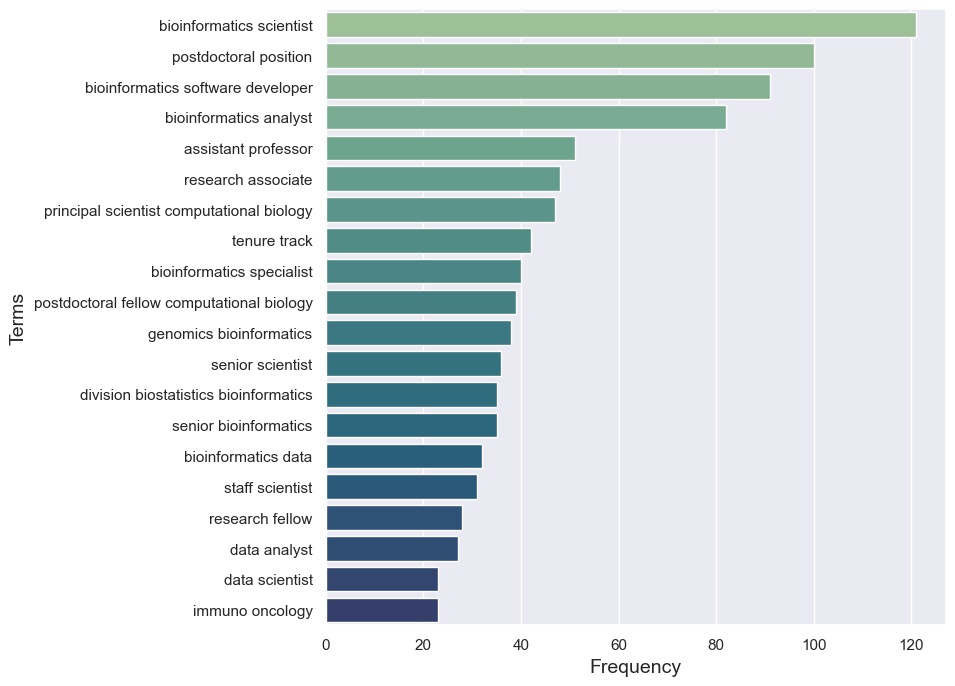

In [30]:
sns.set()
n_bar = 20
df2=df2.head(n_bar)

df2 = df2.sort_values('Frequency', ascending=False)

custom_palette = sns.color_palette("crest", n_colors=n_bar) 
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Frequency', y='Terms', data=df2, palette=custom_palette)

ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Terms', fontsize=14)
plt.show()